In [1]:
!mkdir -p
!wget -O predictive_maintenance.csv https://github.com/rbajaj047/CL653_project_Rashmi_Bajaj/raw/main/predictive_maintenance.csv

mkdir: missing operand
Try 'mkdir --help' for more information.
--2024-04-25 03:16:26--  https://github.com/rbajaj047/CL653_project_Rashmi_Bajaj/raw/main/predictive_maintenance.csv
Resolving github.com (github.com)... 20.27.177.113
Connecting to github.com (github.com)|20.27.177.113|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/rbajaj047/CL653_project_Rashmi_Bajaj/main/predictive_maintenance.csv [following]
--2024-04-25 03:16:26--  https://raw.githubusercontent.com/rbajaj047/CL653_project_Rashmi_Bajaj/main/predictive_maintenance.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 531014 (519K) [text/plain]
Saving to: ‘predictive_maintenance.csv’

predictive_maintena 100%[===================>]

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
df = pd.read_csv('predictive_maintenance.csv')

In [ ]:
df.head()

In [ ]:
df.info()

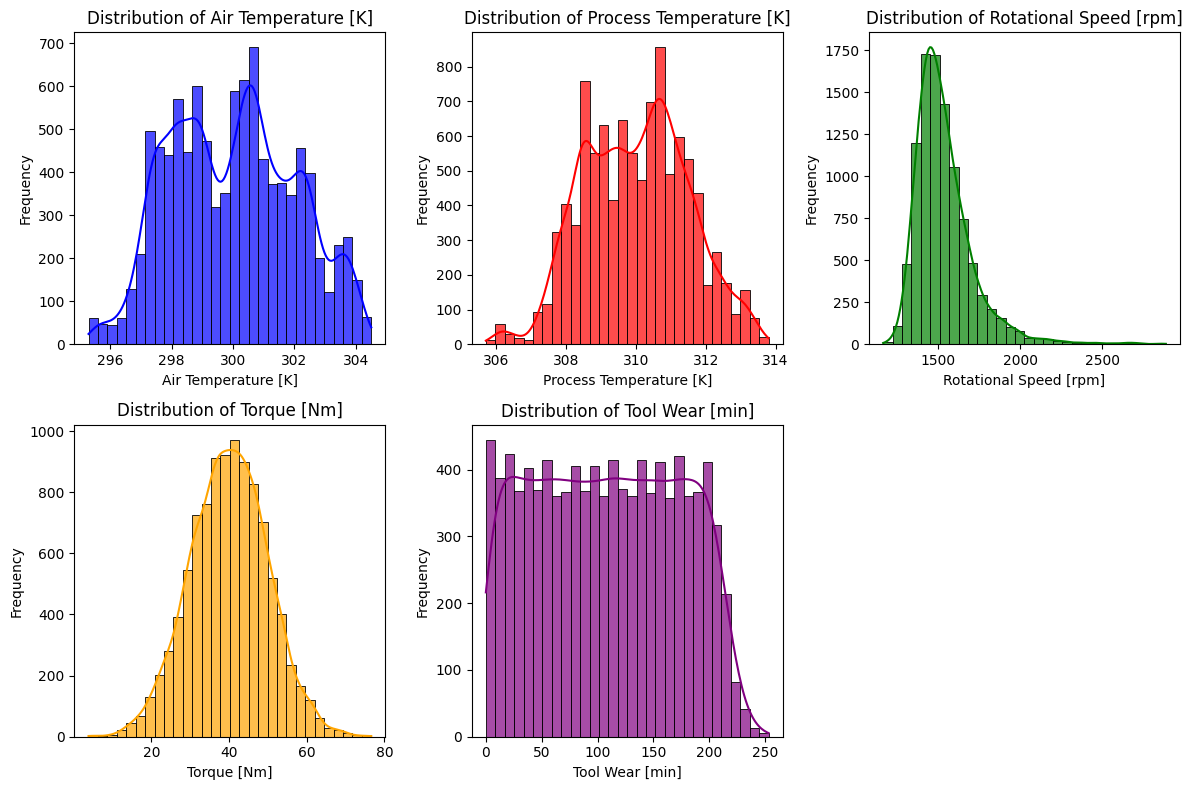

In [6]:
# Histograms for Numerical Features

plt.figure(figsize=(12, 8))

# Air temperature [K]
plt.subplot(2, 3, 1)
sns.histplot(df['Air temperature [K]'], bins=30, kde=True, color='blue', alpha=0.7)
plt.title('Distribution of Air Temperature [K]')
plt.xlabel('Air Temperature [K]')
plt.ylabel('Frequency')

# Process temperature [K]
plt.subplot(2, 3, 2)
sns.histplot(df['Process temperature [K]'], bins=30, kde=True, color='red', alpha=0.7)
plt.title('Distribution of Process Temperature [K]')
plt.xlabel('Process Temperature [K]')
plt.ylabel('Frequency')

# Rotational speed [rpm]
plt.subplot(2, 3, 3)
sns.histplot(df['Rotational speed [rpm]'], bins=30, kde=True, color='green', alpha=0.7)
plt.title('Distribution of Rotational Speed [rpm]')
plt.xlabel('Rotational Speed [rpm]')
plt.ylabel('Frequency')

# Torque [Nm]
plt.subplot(2, 3, 4)
sns.histplot(df['Torque [Nm]'], bins=30, kde=True, color='orange', alpha=0.7)
plt.title('Distribution of Torque [Nm]')
plt.xlabel('Torque [Nm]')
plt.ylabel('Frequency')

# Tool wear [min]
plt.subplot(2, 3, 5)
sns.histplot(df['Tool wear [min]'], bins=30, kde=True, color='purple', alpha=0.7)
plt.title('Distribution of Tool Wear [min]')
plt.xlabel('Tool Wear [min]')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


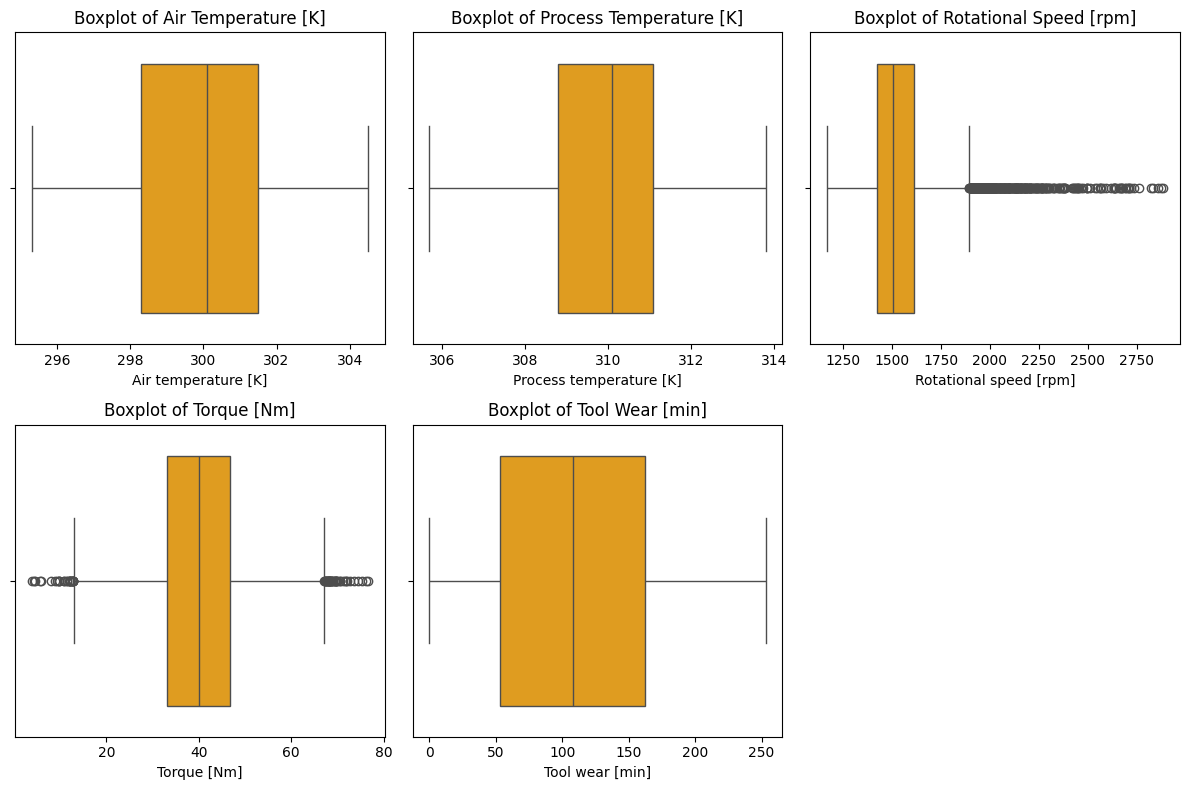

In [7]:
# Boxplots for Numerical Features

plt.figure(figsize=(12, 8))

# Air temperature [K]
plt.subplot(2, 3, 1)
sns.boxplot(x=df['Air temperature [K]'], color='orange')
plt.title('Boxplot of Air Temperature [K]')

# Process temperature [K]
plt.subplot(2, 3, 2)
sns.boxplot(x=df['Process temperature [K]'], color='orange')
plt.title('Boxplot of Process Temperature [K]')

# Rotational speed [rpm]
plt.subplot(2, 3, 3)
sns.boxplot(x=df['Rotational speed [rpm]'], color='orange')
plt.title('Boxplot of Rotational Speed [rpm]')

# Torque [Nm]
plt.subplot(2, 3, 4)
sns.boxplot(x=df['Torque [Nm]'], color='orange')
plt.title('Boxplot of Torque [Nm]')

# Tool wear [min]
plt.subplot(2, 3, 5)
sns.boxplot(x=df['Tool wear [min]'], color='orange')
plt.title('Boxplot of Tool Wear [min]')

plt.tight_layout()
plt.show()


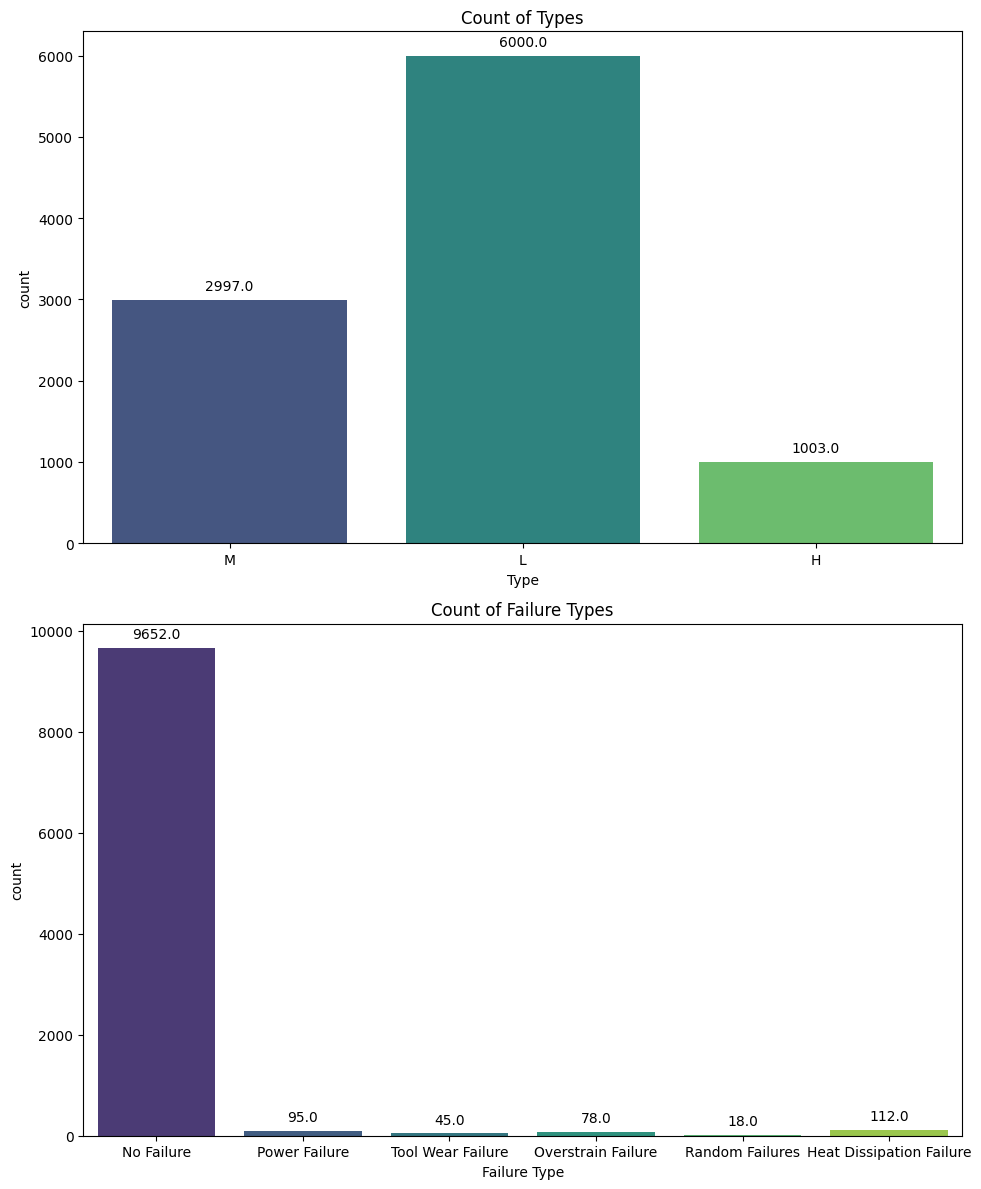

In [8]:
# Countplots for Categorical Features

plt.figure(figsize=(10,12))

# Type
plt.subplot(2, 1, 1)
ax1 = sns.countplot(data=df, x='Type', palette='viridis', hue='Type', legend=False)
plt.title('Count of Types')

for p in ax1.patches:
    ax1.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Failure Type
plt.subplot(2, 1, 2)
ax2 = sns.countplot(data=df, x='Failure Type', palette='viridis', hue='Failure Type', legend=False)
plt.title('Count of Failure Types')

for p in ax2.patches:
    ax2.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.tight_layout()
plt.show()


In [9]:
numerical_features = ['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]']

<Figure size 1500x1000 with 0 Axes>

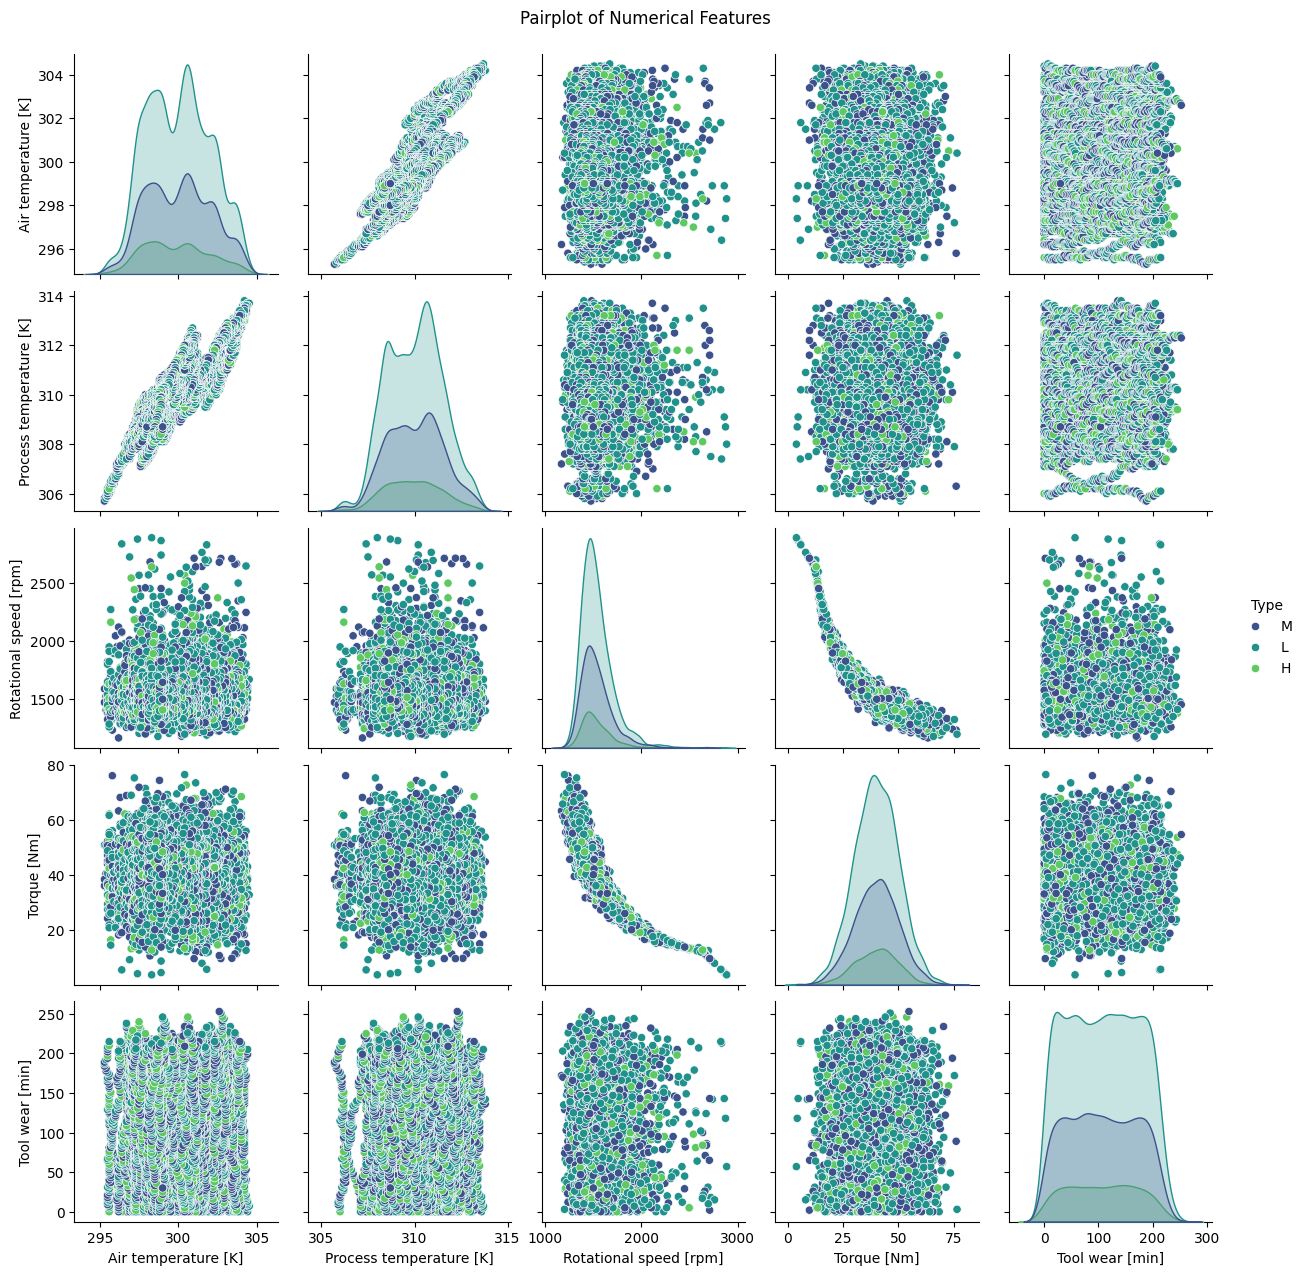

In [10]:
# Pairplot
plt.figure(figsize=(15, 10))
sns.pairplot(df, vars=numerical_features, diag_kind='kde', palette='viridis', hue='Type')
plt.suptitle('Pairplot of Numerical Features', y=1.02)
plt.show()


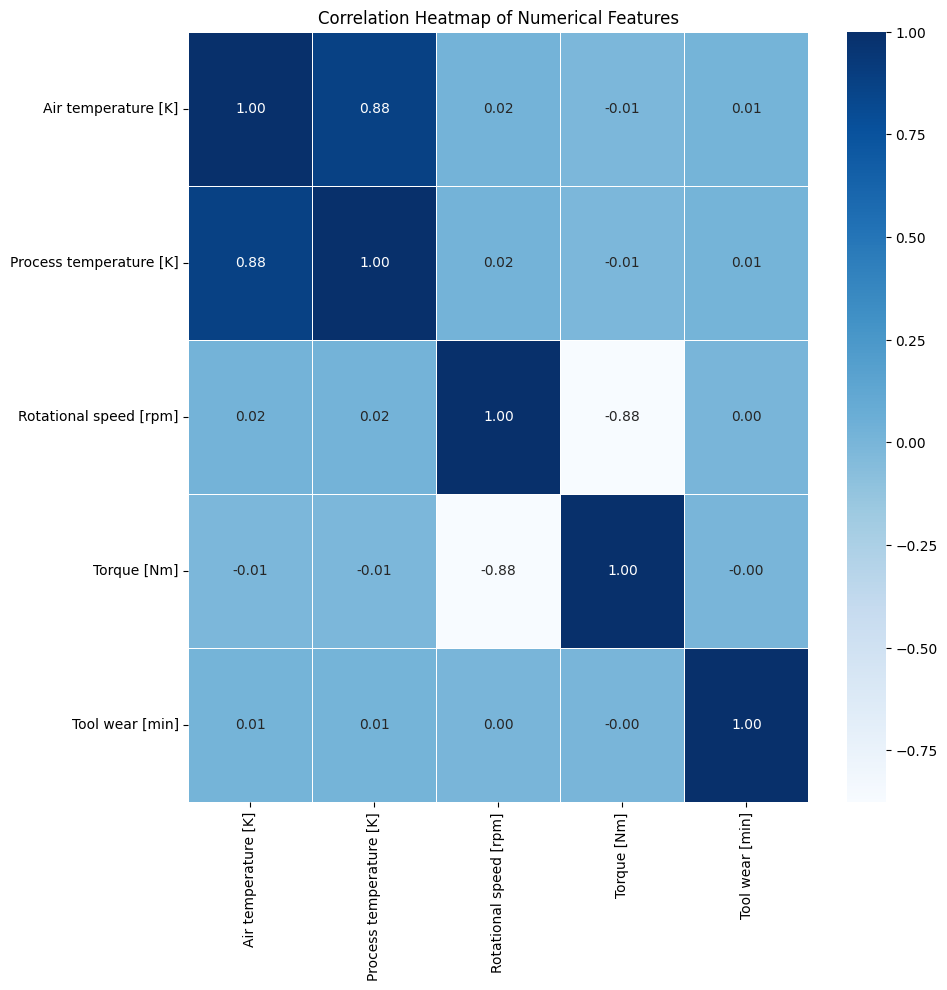

In [11]:
# Computing the correlation matrix:

corr_matrix = df[numerical_features].corr()

# Heatmap:

plt.figure(figsize=(10, 10))
sns.heatmap(corr_matrix, annot=True, cmap='Blues', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Features')
plt.show()


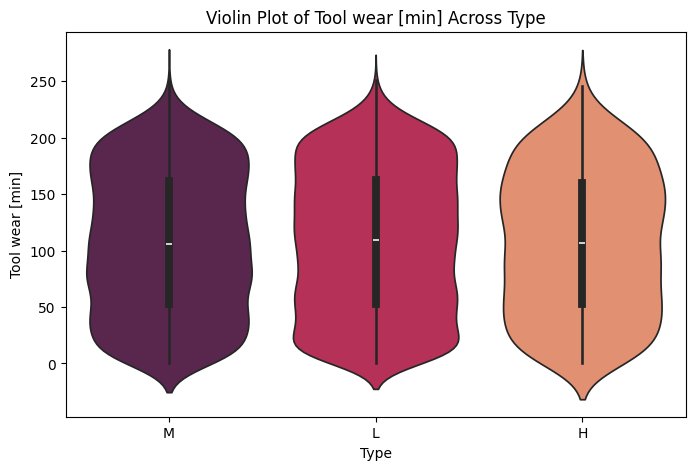

In [12]:

categorical_feature = 'Type'
numerical_feature = 'Tool wear [min]'

# Violin plot

plt.figure(figsize=(8, 5))
sns.violinplot(data=df, x=categorical_feature, y=numerical_feature, palette='rocket', hue=categorical_feature)
plt.title(f'Violin Plot of {numerical_feature} Across {categorical_feature}')
plt.xlabel(categorical_feature)
plt.ylabel(numerical_feature)
plt.show()


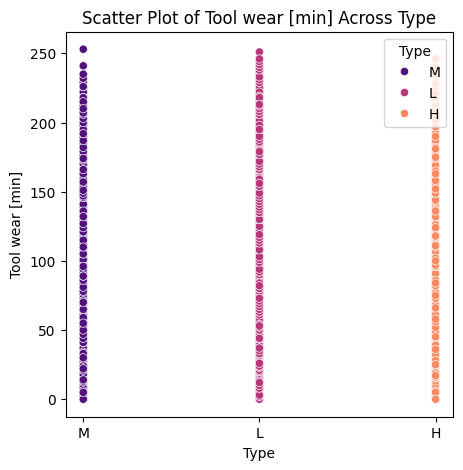

In [13]:
plt.figure(figsize=(5, 5))
sns.scatterplot(data=df, x=categorical_feature, y=numerical_feature, palette='magma', hue=categorical_feature)
plt.title(f'Scatter Plot of {numerical_feature} Across {categorical_feature}')
plt.xlabel(categorical_feature)
plt.ylabel(numerical_feature)
plt.legend(title=categorical_feature)
plt.show()


## DATA PREPROCESSING

In [14]:
df.isnull().sum()

UDI                        0
Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Target                     0
Failure Type               0
dtype: int64

No null values, i.e., data is already clean, else we could either have dropped the respective rows or replaced the null values with some suitable values like mean, median or mode.

In [15]:
df.head()

UDI Product ID Type  Air temperature [K]  Process temperature [K]  \
0    1     M14860    M                298.1                    308.6   
1    2     L47181    L                298.2                    308.7   
2    3     L47182    L                298.1                    308.5   
3    4     L47183    L                298.2                    308.6   
4    5     L47184    L                298.2                    308.7   

   Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  Target Failure Type  
0                    1551         42.8                0       0   No Failure  
1                    1408         46.3                3       0   No Failure  
2                    1498         49.4                5       0   No Failure  
3                    1433         39.5                7       0   No Failure  
4                    1408         40.0                9       0   No Failure

In [16]:
df_standardized = df.copy()

numerical_features = ['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]']

scaler = StandardScaler()
df_standardized[numerical_features] = scaler.fit_transform(df_standardized[numerical_features])

df_standardized.head()


UDI Product ID Type  Air temperature [K]  Process temperature [K]  \
0    1     M14860    M            -0.952389                -0.947360   
1    2     L47181    L            -0.902393                -0.879959   
2    3     L47182    L            -0.952389                -1.014761   
3    4     L47183    L            -0.902393                -0.947360   
4    5     L47184    L            -0.902393                -0.879959   

   Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  Target Failure Type  
0                0.068185     0.282200        -1.695984       0   No Failure  
1               -0.729472     0.633308        -1.648852       0   No Failure  
2               -0.227450     0.944290        -1.617430       0   No Failure  
3               -0.590021    -0.048845        -1.586009       0   No Failure  
4               -0.729472     0.001313        -1.554588       0   No Failure

In [17]:
df['Type'].value_counts()

Type
L    6000
M    2997
H    1003
Name: count, dtype: int64

I am changing the categorical type data in 'Type' column into numerical data using Label-encoding

In [18]:
from sklearn.preprocessing import LabelEncoder

custom_encoding = {
    'L': 0,'M':1,'H':3
}

# Apply custom encoding
df['Type_encoded'] = df['Type'].map(custom_encoding).astype(int)

In [19]:
#After LabelEncoding
df['Type_encoded'].value_counts()

Type_encoded
0    6000
1    2997
3    1003
Name: count, dtype: int64

0 - L

---


1 - M

---


2 - H

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Target                   10000 non-null  int64  
 9   Failure Type             10000 non-null  object 
 10  Type_encoded             10000 non-null  int64  
dtypes: float64(3), int64(5), object(3)
memory usage: 859.5+ KB


Given that I have a relatively small number of features (6 features) in my dataset, and PCA may not provide significant benefits in terms of dimensionality reduction, So I will not use PCA now.

In [21]:
df['Failure Type'].value_counts()

Failure Type
No Failure                  9652
Heat Dissipation Failure     112
Power Failure                 95
Overstrain Failure            78
Tool Wear Failure             45
Random Failures               18
Name: count, dtype: int64

In [22]:
# Defining custom encoding mapping for ease of understanding

custom_encoding = {
    'No Failure': 0,
    'Heat Dissipation Failure': 1,
    'Power Failure': 2,
    'Overstrain Failure': 3,
    'Tool Wear Failure': 4,
    'Random Failures': 5
}

# Apply custom encoding
df['Failure_Type'] = df['Failure Type'].map(custom_encoding).fillna(1).astype(int)

In [23]:
df['Failure_Type'].value_counts()

Failure_Type
0    9652
1     112
2      95
3      78
4      45
5      18
Name: count, dtype: int64

In [24]:
df.head()

UDI Product ID Type  Air temperature [K]  Process temperature [K]  \
0    1     M14860    M                298.1                    308.6   
1    2     L47181    L                298.2                    308.7   
2    3     L47182    L                298.1                    308.5   
3    4     L47183    L                298.2                    308.6   
4    5     L47184    L                298.2                    308.7   

   Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  Target Failure Type  \
0                    1551         42.8                0       0   No Failure   
1                    1408         46.3                3       0   No Failure   
2                    1498         49.4                5       0   No Failure   
3                    1433         39.5                7       0   No Failure   
4                    1408         40.0                9       0   No Failure   

   Type_encoded  Failure_Type  
0             1             0  
1             0             0  
2             0             0  
3             0             0  
4             0             0

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

X = df[['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]', 'Type_encoded']]
y1 = df['Target']
y2 = df['Failure Type']

X_train, X_test, y1_train, y1_test, y2_train, y2_test = train_test_split(X, y1, y2, test_size=0.2, random_state=69)

target_classifier = RandomForestClassifier()
target_classifier.fit(X_train, y1_train)
y1_pred = target_classifier.predict(X_test)
accuracy_target = accuracy_score(y1_test, y1_pred)
print("Accuracy for 'Target' variable:", accuracy_target)

failure_type_classifier = RandomForestClassifier()
failure_type_classifier.fit(X_train, y2_train)
y2_pred = failure_type_classifier.predict(X_test)
accuracy_failure_type = accuracy_score(y2_test, y2_pred)
print("Accuracy for 'Failure Type' variable:", accuracy_failure_type)


Accuracy for 'Target' variable: 0.9835
Accuracy for 'Failure Type' variable: 0.984


In [26]:
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, classification_report

precision_target = precision_score(y1_test, y1_pred)
recall_target = recall_score(y1_test, y1_pred)
f1_score_target = f1_score(y1_test, y1_pred)

confusion_matrix_target = confusion_matrix(y1_test, y1_pred)

print(' For Target variable: \n')

print("Precision:", precision_target)
print("Recall", recall_target)
print("F1-score", f1_score_target)

print("\nConfusion Matrix")
print(confusion_matrix_target)

classification_report_target = classification_report(y1_test, y1_pred)
print("\nClassification Report")
print(classification_report_target)


 For Target variable: 

Precision: 0.8285714285714286
Recall 0.5178571428571429
F1-score 0.6373626373626374

Confusion Matrix
[[1938    6]
 [  27   29]]

Classification Report
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1944
           1       0.83      0.52      0.64        56

    accuracy                           0.98      2000
   macro avg       0.91      0.76      0.81      2000
weighted avg       0.98      0.98      0.98      2000



In [27]:
precision_failure_type = precision_score(y2_test, y2_pred, average='weighted', zero_division=0)
recall_failure_type = recall_score(y2_test, y2_pred, average='weighted', zero_division=0)
f1_score_failure_type = f1_score(y2_test, y2_pred, average='weighted', zero_division=0)

confusion_matrix_failure_type = confusion_matrix(y2_test, y2_pred)

print(' For Target variable: \n')

print("Precision variable:", precision_failure_type)
print("Recall variable:", recall_failure_type)
print("F1-score variable:", f1_score_failure_type)

print("\nConfusion Matrix variable:")
print(confusion_matrix_failure_type)

classification_report_failure_type = classification_report(y2_test, y2_pred, zero_division=0)
print("\nClassification Report variable:")
print(classification_report_failure_type)


 For Target variable: 

Precision variable: 0.9773564232721593
Recall variable: 0.984
F1-score variable: 0.9798581740513963

Confusion Matrix variable:
[[  12    5    0    1    0    0]
 [   1 1941    1    0    0    0]
 [   0    8    6    0    0    0]
 [   0    4    0    9    0    0]
 [   0    1    0    0    0    0]
 [   0   11    0    0    0    0]]

Classification Report variable:
                          precision    recall  f1-score   support

Heat Dissipation Failure       0.92      0.67      0.77        18
              No Failure       0.99      1.00      0.99      1943
      Overstrain Failure       0.86      0.43      0.57        14
           Power Failure       0.90      0.69      0.78        13
         Random Failures       0.00      0.00      0.00         1
       Tool Wear Failure       0.00      0.00      0.00        11

                accuracy                           0.98      2000
               macro avg       0.61      0.46      0.52      2000
            weighted

In [28]:
df_standardized.head()

UDI Product ID Type  Air temperature [K]  Process temperature [K]  \
0    1     M14860    M            -0.952389                -0.947360   
1    2     L47181    L            -0.902393                -0.879959   
2    3     L47182    L            -0.952389                -1.014761   
3    4     L47183    L            -0.902393                -0.947360   
4    5     L47184    L            -0.902393                -0.879959   

   Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  Target Failure Type  
0                0.068185     0.282200        -1.695984       0   No Failure  
1               -0.729472     0.633308        -1.648852       0   No Failure  
2               -0.227450     0.944290        -1.617430       0   No Failure  
3               -0.590021    -0.048845        -1.586009       0   No Failure  
4               -0.729472     0.001313        -1.554588       0   No Failure

In [29]:
df_standardized['Type_encoded'] = df['Type_encoded']
df_standardized['Failure_Type'] = df['Failure_Type']
df_standardized.head()

UDI Product ID Type  Air temperature [K]  Process temperature [K]  \
0    1     M14860    M            -0.952389                -0.947360   
1    2     L47181    L            -0.902393                -0.879959   
2    3     L47182    L            -0.952389                -1.014761   
3    4     L47183    L            -0.902393                -0.947360   
4    5     L47184    L            -0.902393                -0.879959   

   Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  Target Failure Type  \
0                0.068185     0.282200        -1.695984       0   No Failure   
1               -0.729472     0.633308        -1.648852       0   No Failure   
2               -0.227450     0.944290        -1.617430       0   No Failure   
3               -0.590021    -0.048845        -1.586009       0   No Failure   
4               -0.729472     0.001313        -1.554588       0   No Failure   

   Type_encoded  Failure_Type  
0             1             0  
1             0             0  
2             0             0  
3             0             0  
4             0             0

In [30]:
# Standardize the Type_encoded and Failure_Type columns

scaler = StandardScaler()

df_standardized['Type_encoded'] = scaler.fit_transform(df_standardized[['Type_encoded']])
df_standardized['Failure_Type'] = scaler.fit_transform(df_standardized[['Failure_Type']])

df_standardized.head()

UDI Product ID Type  Air temperature [K]  Process temperature [K]  \
0    1     M14860    M            -0.952389                -0.947360   
1    2     L47181    L            -0.902393                -0.879959   
2    3     L47182    L            -0.952389                -1.014761   
3    4     L47183    L            -0.902393                -0.947360   
4    5     L47184    L            -0.902393                -0.879959   

   Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  Target Failure Type  \
0                0.068185     0.282200        -1.695984       0   No Failure   
1               -0.729472     0.633308        -1.648852       0   No Failure   
2               -0.227450     0.944290        -1.617430       0   No Failure   
3               -0.590021    -0.048845        -1.586009       0   No Failure   
4               -0.729472     0.001313        -1.554588       0   No Failure   

   Type_encoded  Failure_Type  
0      0.435346     -0.168098  
1     -0.654654     -0.168098  
2     -0.654654     -0.168098  
3     -0.654654     -0.168098  
4     -0.654654     -0.168098

In [31]:
numerical_features = ['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]','Type_encoded','Failure_Type']
df_standardized_numerical = df_standardized[numerical_features]

pca = PCA(n_components=3)

pca.fit(df_standardized_numerical)

df_pca = pca.transform(df_standardized_numerical)

df_pca = pd.DataFrame(df_pca, columns=['PC1', 'PC2', 'PC3'])

df_pca.head()


PC1       PC2       PC3
0 -0.975069  1.033412 -1.282817
1 -1.530859  0.435457 -1.190295
2 -1.510238  0.613305 -1.111966
3 -1.114023  0.836031 -1.099383
4 -1.186588  0.715175 -1.099262

In [32]:
# Dependence of PC1 on the original features
print("PC1 Loadings:")
print(pca.components_[0])

# Dependence of PC2 on the original features
print("\nPC2 Loadings:")
print(pca.components_[1])

# Dependence of PC3 on the original features
print("\nPC3 Loadings:")
print(pca.components_[2])


PC1 Loadings:
[ 0.44995183  0.44950311  0.54319223 -0.54393221  0.00539737 -0.01414939
 -0.06588567]

PC2 Loadings:
[-0.54308842 -0.5426711   0.43453934 -0.44828124 -0.03811553  0.02607456
 -0.13656453]

PC3 Loadings:
[-0.04558663 -0.05643008  0.11645045 -0.03903305  0.70402687 -0.15781142
  0.67756546]


In [33]:
loadings_pc1 = pca.components_[0]
loadings_pc2 = pca.components_[1]
loadings_pc3 = pca.components_[2]

# Equations for PC1, PC2, and PC3 in terms of original features
equation_pc1 = "PC1 = "
equation_pc2 = "PC2 = "
equation_pc3 = "PC3 = "

for feature, loading in zip(numerical_features, loadings_pc1):
    equation_pc1 += f"({loading:.4f} * {feature}) + "
equation_pc1 = equation_pc1[:-3]

for feature, loading in zip(numerical_features, loadings_pc2):
    equation_pc2 += f"({loading:.4f} * {feature}) + "
equation_pc2 = equation_pc2[:-3]

for feature, loading in zip(numerical_features, loadings_pc3):
    equation_pc3 += f"({loading:.4f} * {feature}) + "
equation_pc3 = equation_pc3[:-3]

print("Equation for PC1:")
print(equation_pc1)
print("\nEquation for PC2:")
print(equation_pc2)
print("\nEquation for PC3:")
print(equation_pc3)


Equation for PC1:
PC1 = (0.4500 * Air temperature [K]) + (0.4495 * Process temperature [K]) + (0.5432 * Rotational speed [rpm]) + (-0.5439 * Torque [Nm]) + (0.0054 * Tool wear [min]) + (-0.0141 * Type_encoded) + (-0.0659 * Failure_Type)

Equation for PC2:
PC2 = (-0.5431 * Air temperature [K]) + (-0.5427 * Process temperature [K]) + (0.4345 * Rotational speed [rpm]) + (-0.4483 * Torque [Nm]) + (-0.0381 * Tool wear [min]) + (0.0261 * Type_encoded) + (-0.1366 * Failure_Type)

Equation for PC3:
PC3 = (-0.0456 * Air temperature [K]) + (-0.0564 * Process temperature [K]) + (0.1165 * Rotational speed [rpm]) + (-0.0390 * Torque [Nm]) + (0.7040 * Tool wear [min]) + (-0.1578 * Type_encoded) + (0.6776 * Failure_Type)


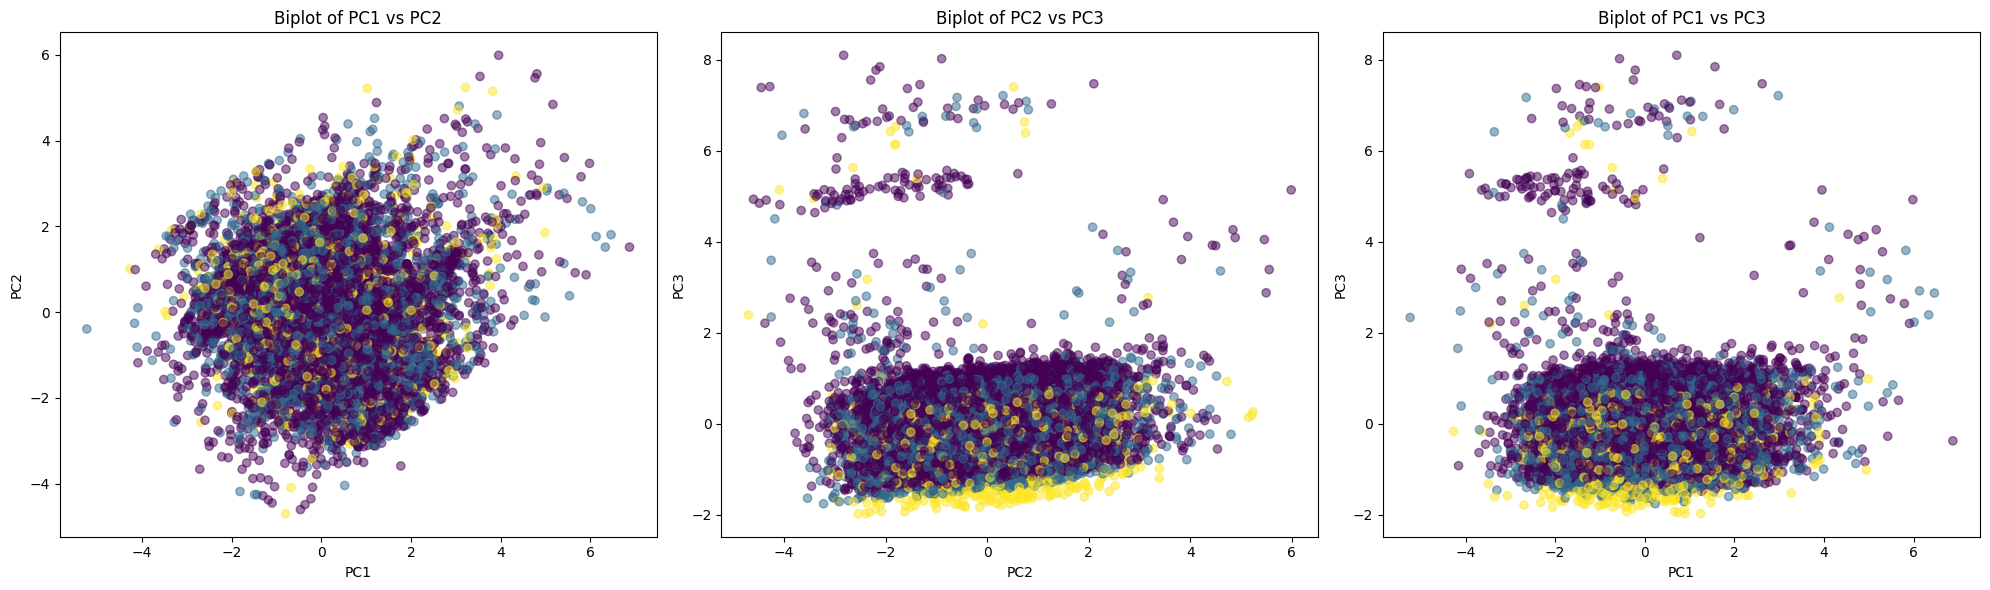

In [34]:
# Create a figure with one row and three columns
plt.figure(figsize=(20, 6))

# Biplot for PC1 vs PC2
plt.subplot(1, 3, 1)
plt.scatter(df_pca['PC1'], df_pca['PC2'], c=df['Type_encoded'], cmap='viridis', alpha=0.5)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Biplot of PC1 vs PC2')

# Biplot for PC2 vs PC3
plt.subplot(1, 3, 2)
plt.scatter(df_pca['PC2'], df_pca['PC3'], c=df['Type_encoded'], cmap='viridis', alpha=0.5)
plt.xlabel('PC2')
plt.ylabel('PC3')
plt.title('Biplot of PC2 vs PC3')

# Biplot for PC1 vs PC3
plt.subplot(1, 3, 3)
plt.scatter(df_pca['PC1'], df_pca['PC3'], c=df['Type_encoded'], cmap='viridis', alpha=0.5)
plt.xlabel('PC1')
plt.ylabel('PC3')
plt.title('Biplot of PC1 vs PC3')

# Adjusting layout
plt.tight_layout()

plt.show()


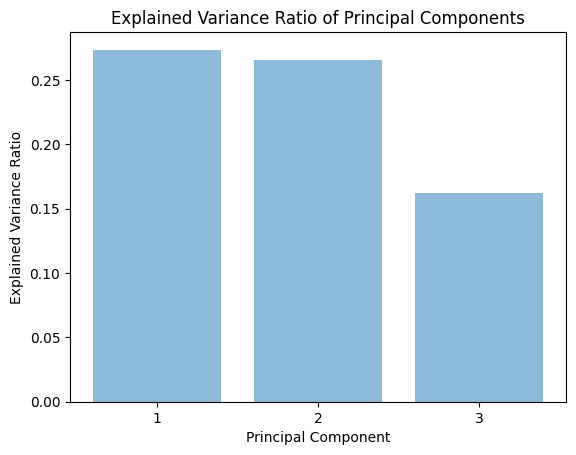

In [35]:
explained_variance_ratio = pca.explained_variance_ratio_

# Plotting the explained variance ratio:
plt.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, alpha=0.5, align='center')
plt.xticks(range(1, len(explained_variance_ratio) + 1))
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio of Principal Components')
plt.show()

SCREE PLOT

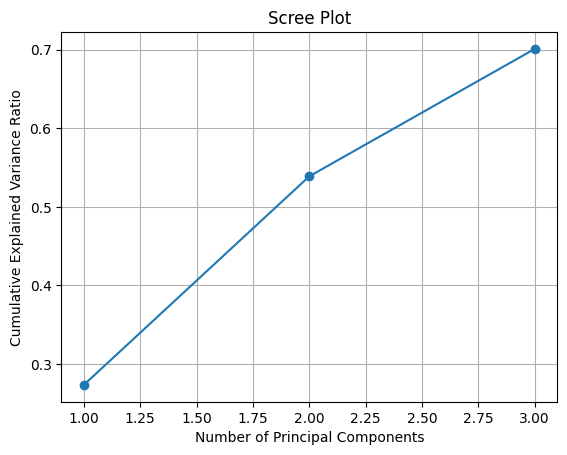

In [36]:
cumulative_explained_variance_ratio = np.cumsum(explained_variance_ratio)

plt.plot(range(1, len(cumulative_explained_variance_ratio) + 1), cumulative_explained_variance_ratio, marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Scree Plot')
plt.grid(True)
plt.show()


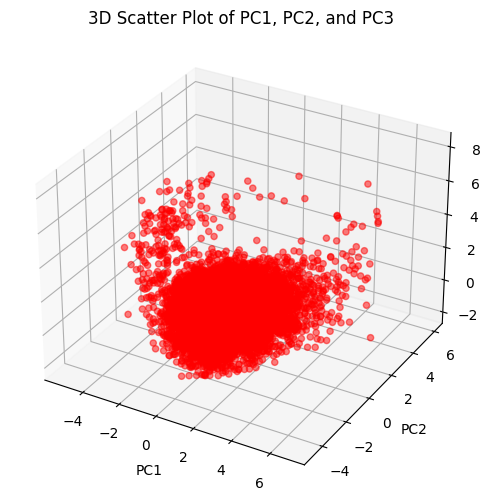

In [37]:
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits import mplot3d

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

ax.scatter3D(df_pca['PC1'], df_pca['PC2'], df_pca['PC3'], alpha=0.5, color='red')

ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.set_title('3D Scatter Plot of PC1, PC2, and PC3')

plt.show()


### RANDOM FOREST

In [38]:
X = df_pca
y_target = df['Target']
y_failure_type = df['Failure_Type']

X_train_target, X_test_target, y_train_target, y_test_target = train_test_split(X, y_target, test_size=0.2, random_state=69)
X_train_failure_type, X_test_failure_type, y_train_failure_type, y_test_failure_type = train_test_split(X, y_failure_type, test_size=0.2, random_state=42)

rf_classifier = RandomForestClassifier(random_state=69)

rf_classifier.fit(X_train_target, y_train_target)
y_pred_target = rf_classifier.predict(X_test_target)

rf_classifier.fit(X_train_failure_type, y_train_failure_type)
y_pred_failure_type = rf_classifier.predict(X_test_failure_type)

accuracy_target = accuracy_score(y_test_target, y_pred_target)
print("Accuracy for Target prediction:", accuracy_target)

accuracy_failure_type = accuracy_score(y_test_failure_type, y_pred_failure_type)
print("Accuracy for Failure Type prediction:", accuracy_failure_type)

print("\nClassification Report for Target prediction:")
print(classification_report(y_test_target, y_pred_target))

print("Classification Report for Failure Type prediction:")
print(classification_report(y_test_failure_type, y_pred_failure_type))

conf_matrix_rf_target = confusion_matrix(y_test_target, y_pred_target)
conf_matrix_rf_failure_type = confusion_matrix(y_test_failure_type, y_pred_failure_type)

print("\nConfusion matrix for Target prediction:")
print(conf_matrix_rf_target)

print("\nConfusion matrix for Failure Type prediction:")
print(conf_matrix_rf_failure_type)

Accuracy for Target prediction: 0.9945
Accuracy for Failure Type prediction: 0.992

Classification Report for Target prediction:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      1944
           1       1.00      0.80      0.89        56

    accuracy                           0.99      2000
   macro avg       1.00      0.90      0.94      2000
weighted avg       0.99      0.99      0.99      2000

Classification Report for Failure Type prediction:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1935
           1       0.73      0.53      0.62        15
           2       1.00      0.95      0.97        20
           3       0.93      1.00      0.96        13
           4       0.67      0.91      0.77        11
           5       1.00      0.17      0.29         6

    accuracy                           0.99      2000
   macro avg       0.89      0.76      0.77      2000
weigh

### SVM

In [39]:
from sklearn.svm import SVC

svm_classifier = SVC(random_state=69)

svm_classifier.fit(X_train_target, y_train_target)
y_pred_target_svm = svm_classifier.predict(X_test_target)

svm_classifier.fit(X_train_failure_type, y_train_failure_type)
y_pred_failure_type_svm = svm_classifier.predict(X_test_failure_type)

accuracy_target_svm = accuracy_score(y_test_target, y_pred_target_svm)
print("Accuracy for Target prediction using SVM:", accuracy_target_svm)

accuracy_failure_type_svm = accuracy_score(y_test_failure_type, y_pred_failure_type_svm)
print("Accuracy for Failure Type prediction using SVM:", accuracy_failure_type_svm)

print("\nClassification Report for Target prediction using SVM:")
print(classification_report(y_test_target, y_pred_target_svm))

print("Classification Report for Failure Type prediction using SVM:")
print(classification_report(y_test_failure_type, y_pred_failure_type_svm, zero_division=0))

conf_matrix_svm_target = confusion_matrix(y_test_target, y_pred_target_svm)
conf_matrix_svm_failure_type = confusion_matrix(y_test_failure_type, y_pred_failure_type_svm)

print("\nConfusion matrix for Target prediction:")
print(conf_matrix_svm_target)

print("\nConfusion matrix for Failure Type prediction:")
print(conf_matrix_svm_failure_type)

Accuracy for Target prediction using SVM: 0.9945
Accuracy for Failure Type prediction using SVM: 0.9935

Classification Report for Target prediction using SVM:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      1944
           1       0.98      0.82      0.89        56

    accuracy                           0.99      2000
   macro avg       0.99      0.91      0.95      2000
weighted avg       0.99      0.99      0.99      2000

Classification Report for Failure Type prediction using SVM:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1935
           1       1.00      0.53      0.70        15
           2       1.00      1.00      1.00        20
           3       1.00      1.00      1.00        13
           4       0.65      1.00      0.79        11
           5       0.00      0.00      0.00         6

    accuracy                           0.99      2000
   macro avg      

### DECISION TREE

In [40]:
from sklearn.tree import DecisionTreeClassifier

dt_classifier = DecisionTreeClassifier(random_state=42)

dt_classifier.fit(X_train_target, y_train_target)
y_pred_target_dt = dt_classifier.predict(X_test_target)

dt_classifier.fit(X_train_failure_type, y_train_failure_type)
y_pred_failure_type_dt = dt_classifier.predict(X_test_failure_type)

accuracy_target_dt = accuracy_score(y_test_target, y_pred_target_dt)
print("Accuracy for Target prediction using Decision Tree:", accuracy_target_dt)

accuracy_failure_type_dt = accuracy_score(y_test_failure_type, y_pred_failure_type_dt)
print("Accuracy for Failure Type prediction using Decision Tree:", accuracy_failure_type_dt)

print("Classification Report for Target prediction using Decision Tree:")
print(classification_report(y_test_target, y_pred_target_dt, zero_division=0))

print("Classification Report for Failure Type prediction using Decision Tree:")
print(classification_report(y_test_failure_type, y_pred_failure_type_dt, zero_division=0))

conf_matrix_dt_target = confusion_matrix(y_test_target, y_pred_target_dt)
conf_matrix_dt_failure_type = confusion_matrix(y_test_failure_type, y_pred_failure_type_dt)

print("\nConfusion matrix for Target prediction:")
print(conf_matrix_dt_target)

print("\nConfusion matrix for Failure Type prediction:")
print(conf_matrix_dt_failure_type)

Accuracy for Target prediction using Decision Tree: 0.9875
Accuracy for Failure Type prediction using Decision Tree: 0.9895
Classification Report for Target prediction using Decision Tree:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1944
           1       0.77      0.79      0.78        56

    accuracy                           0.99      2000
   macro avg       0.88      0.89      0.89      2000
weighted avg       0.99      0.99      0.99      2000

Classification Report for Failure Type prediction using Decision Tree:
              precision    recall  f1-score   support

           0       1.00      0.99      1.00      1935
           1       0.45      0.60      0.51        15
           2       1.00      0.95      0.97        20
           3       1.00      1.00      1.00        13
           4       0.83      0.91      0.87        11
           5       0.80      0.67      0.73         6

    accuracy                     

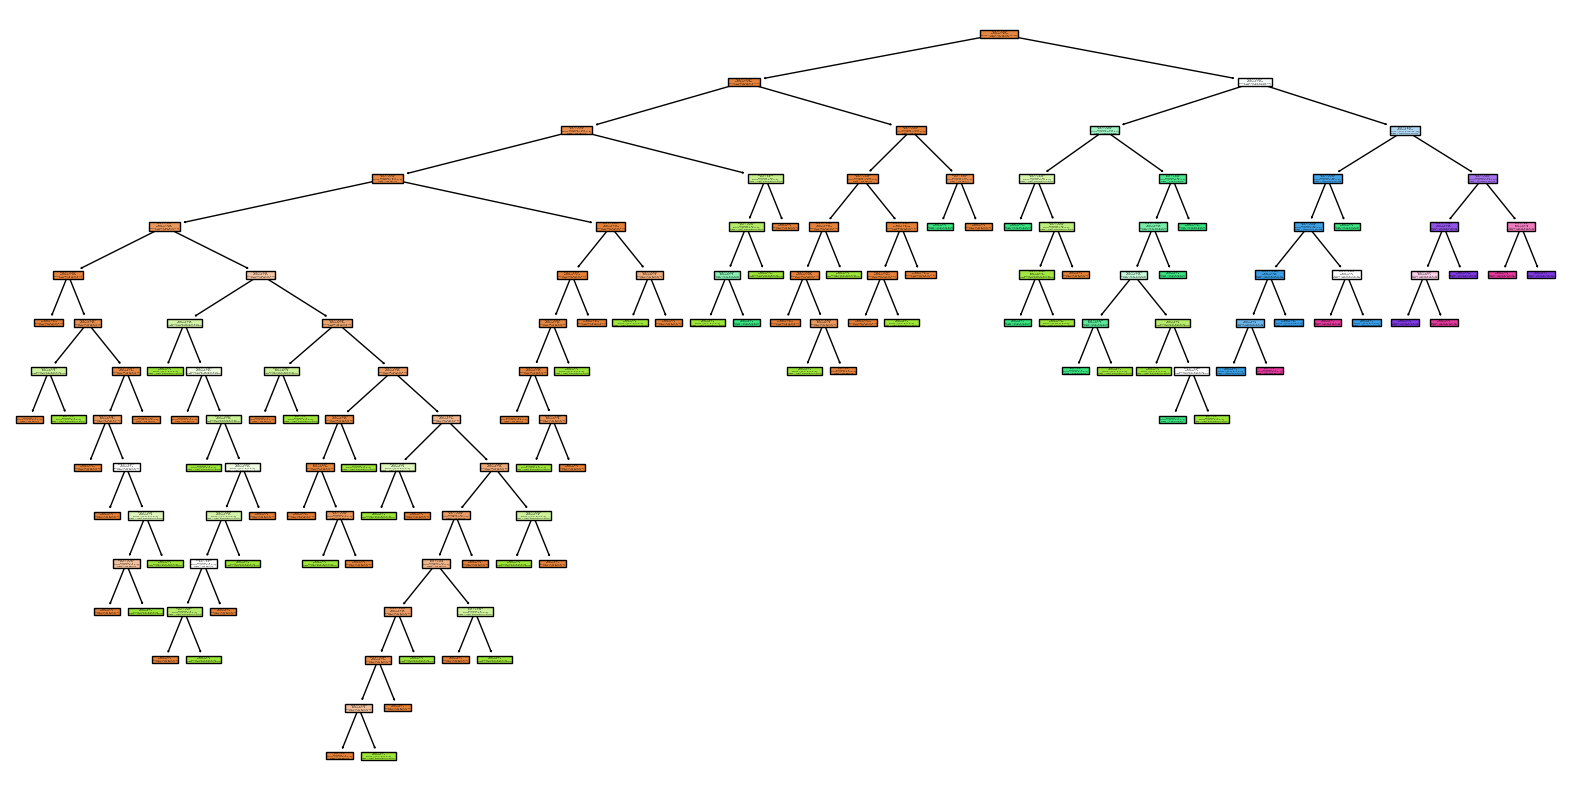

In [41]:
from sklearn.tree import plot_tree

# Plot the Decision Tree for target prediction
plt.figure(figsize=(20,10))
plot_tree(dt_classifier, feature_names=['PC1', 'PC2', 'PC3'], class_names=['No Failure', 'Heat Dissipation Failure', 'Power Failure', 'Overstrain Failure', 'Tool Wear Failure', 'Random Failures'], filled=True)
plt.show()

This is just to show that Decision Trees can be really complex.

### XGBoost

In [42]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report

xgb_classifier_target = XGBClassifier()
xgb_classifier_target.fit(X_train_target, y_train_target)
y_pred_xgb_target = xgb_classifier_target.predict(X_test_target)
accuracy_xgb_target = accuracy_score(y_test_target, y_pred_xgb_target)
print("Accuracy for XGBoost (Target prediction):", accuracy_xgb_target)
report_xgb_target = classification_report(y_test_target, y_pred_xgb_target)
print("Classification Report for XGBoost (Target prediction):\n", report_xgb_target)
cm_target = confusion_matrix(y_test_target, y_pred_xgb_target)
print("Confusion Matrix for XGBoost (Target prediction):\n", cm_target)

xgb_classifier_failure_type = XGBClassifier()
xgb_classifier_failure_type.fit(X_train_failure_type, y_train_failure_type)
y_pred_xgb_failure_type = xgb_classifier_failure_type.predict(X_test_failure_type)
accuracy_xgb_failure_type = accuracy_score(y_test_failure_type, y_pred_xgb_failure_type)
print("\nAccuracy for XGBoost (Failure Type prediction):", accuracy_xgb_failure_type)
report_xgb_failure_type = classification_report(y_test_failure_type, y_pred_xgb_failure_type,zero_division=0)
print("Classification Report for XGBoost (Failure Type prediction):\n", report_xgb_failure_type)
cm_failure_type = confusion_matrix(y_test_failure_type, y_pred_xgb_failure_type)
print("Confusion Matrix for XGBoost (Failure Type prediction):\n", cm_failure_type)

Accuracy for XGBoost (Target prediction): 0.994
Classification Report for XGBoost (Target prediction):
               precision    recall  f1-score   support

           0       0.99      1.00      1.00      1944
           1       0.98      0.80      0.88        56

    accuracy                           0.99      2000
   macro avg       0.99      0.90      0.94      2000
weighted avg       0.99      0.99      0.99      2000

Confusion Matrix for XGBoost (Target prediction):
 [[1943    1]
 [  11   45]]

Accuracy for XGBoost (Failure Type prediction): 0.99
Classification Report for XGBoost (Failure Type prediction):
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1935
           1       0.60      0.60      0.60        15
           2       1.00      0.95      0.97        20
           3       0.87      1.00      0.93        13
           4       0.60      0.82      0.69        11
           5       0.00      0.00      0.00       

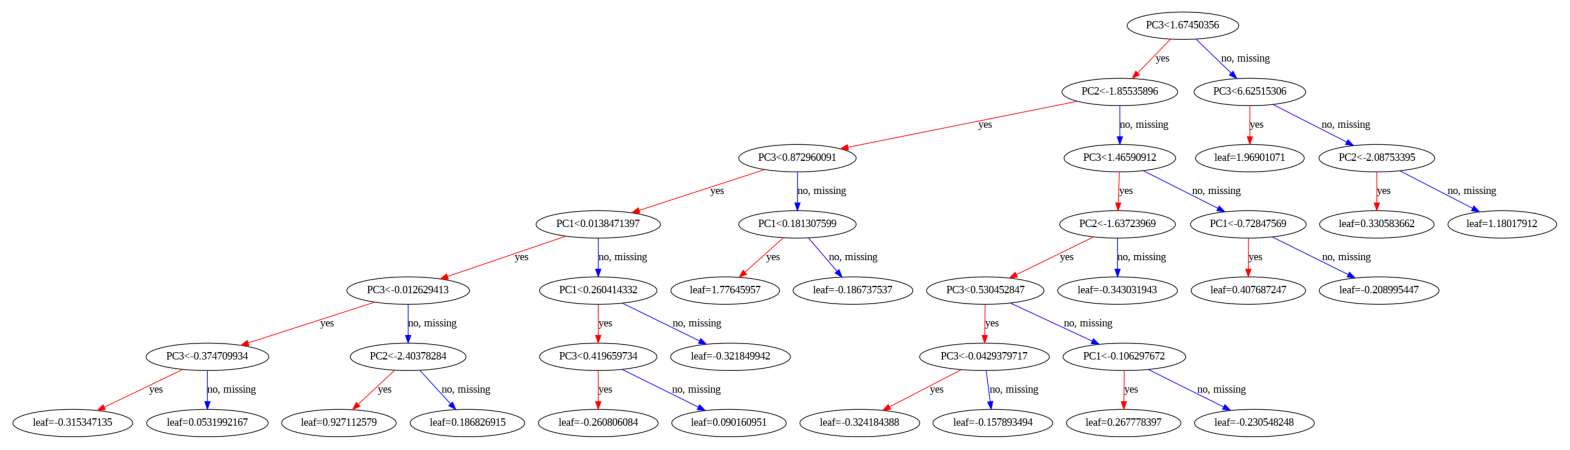

In [43]:
from xgboost import plot_tree

plt.figure(figsize=(20, 10))
plot_tree(xgb_classifier_target, num_trees=0, ax=plt.gca())
plt.show()

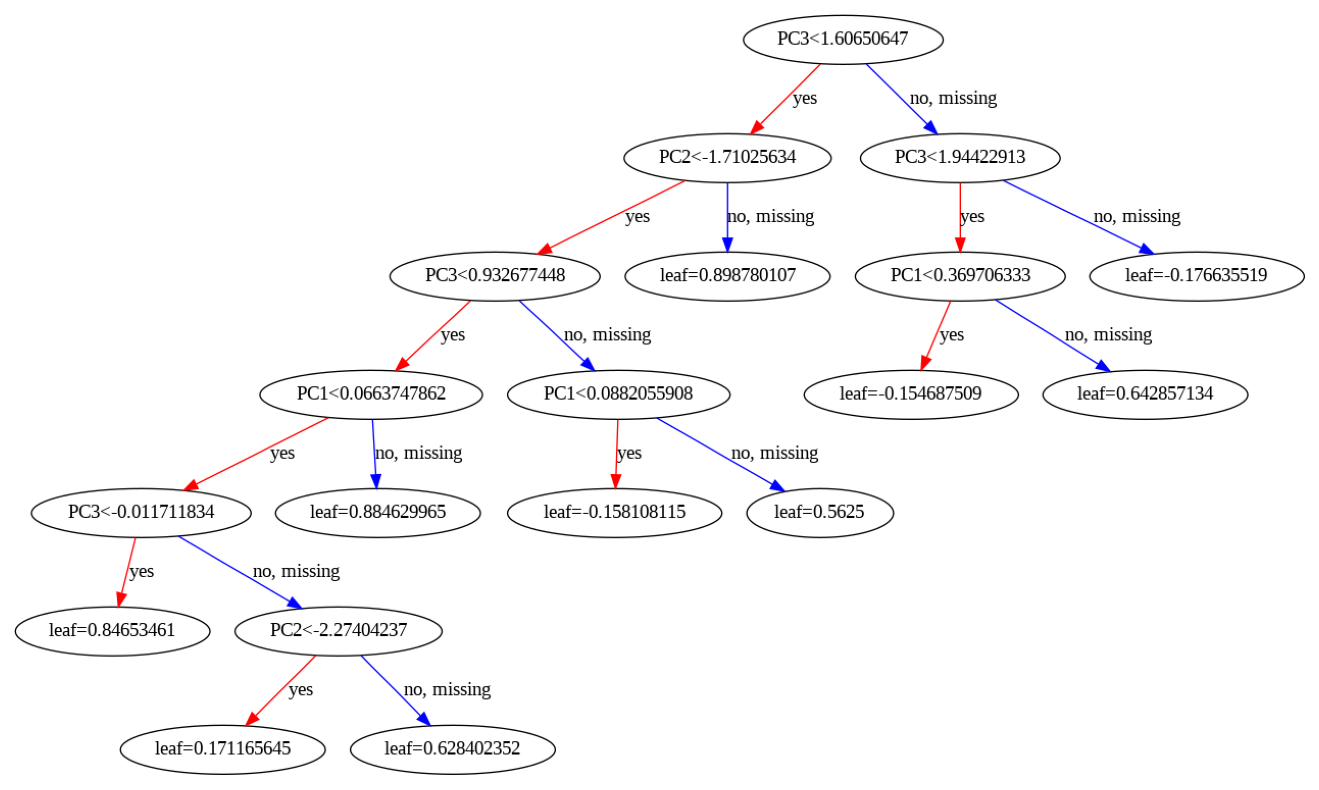

In [44]:

plt.figure(figsize=(20, 10))
plot_tree(xgb_classifier_failure_type, num_trees=0, ax=plt.gca())
plt.show()
